In [115]:
# The usual suspects (and json)
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
from nltk.stem import PorterStemmer
from nltk import SnowballStemmer
from sklearn.manifold import TSNE
import nltk

from helper_functions.lyrics_cleaners import rep_linebrk, display_topics

# Pipeline functions
from helper_functions.pipeline import NLPPipe, tweet_clean1

# # Helper functions
# from Py_Files.helper_functions import txt_to_df, scatter, display_topics

# Visualization packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
all_proj = pd.read_pickle("AllBeatlesProj.pkl")

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
all_proj = all_proj.reset_index()
all_proj = all_proj.drop_duplicates(subset='song_title').reset_index().drop(columns='index')
all_proj['lyrics'] = all_proj['lyrics'].apply(lambda x: rep_linebrk(x))

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
corpus_list = all_proj['lyrics'].tolist()
# Let's turn all of the tweets into a list, so our Pipeline
# can work with our data better

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('oh')
stopwords.append('ve')
stopwords.append('ll')
stopwords.append('ooh')
stopwords.append('na')
stopwords.append('la')
stopwords.append('ca')
stopwords.append('wo')
stopwords.append('ah')
stopwords.append('yeah')
stopwords.append('oo')
stopwords.append('woah')
stopwords.append('well')
stopwords.append('doo')
stopwords.append('da')
stopwords.append('mm')
stopwords.append('mmm')
stopwords.append('uh')
stopwords.append('hey')
stopwords.append('go')
stopwords.append('know')
stopwords.append('like')
stopwords.append('see')
stopwords.append('get')
stopwords.append('got')
stopwords.append('one')
stopwords.append('way')
stopwords.append('could')
stopwords.append('make')
stopwords.append('thing')
stopwords.append('whoa')
stopwords.append('let')
stopwords.append('would')
stopwords.append('woo')
stopwords.append('love')
stopwords.append('yes')
stopwords.append('gonna')
stopwords.append('caus')
stopwords.append('come')
stopwords.append('want')
stopwords.append('though')
stopwords.append('say')

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words=stopwords, max_df=0.80, min_df=10), 
              tokenizer=TweetTokenizer().tokenize, 
              stemmer=SnowballStemmer("english",ignore_stopwords=True))
# TF-IDF may be better for our dataset. It works better with sparse datasets

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
nlp.fit(corpus_list)
dtm_tfidf = nlp.transform(corpus_list)
# Fit the corpus and transform the corpus

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
nmf_model = NMF(6, random_state=1)
doc_topic = nmf_model.fit_transform(dtm_tfidf)
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 25)
# These topics look a bit better than LDA.
# 0 - IDK, # 1 - Love, # 2 - Relationships, # 3 - Longing, # 4 - Desire, # 5 - Rock N Roll


Topic  0
time, day, need, long, feel, away, life, world, play, take, night, live, alway, sun, us, find, think, noth, hold, home, mind, place, everi, call, hard

Topic  1
babi, man, pleas, say, said, mayb, cri, woman, wait, long, fine, run, honey, keep, drive, bye, shake, leav, ride, song, tri, everybodi, name, tomorrow, babe

Topic  2
look, girl, good, boy, nobodi, man, turn, knew, anoth, saw, chang, dear, said, life, head, kind, find, around, sky, everi, told, someon, pretti, ask, feel

Topic  3
tell, say, never, right, word, true, gon, said, cri, peopl, darl, wrong, heart, believ, talk, ever, lie, feel, hear, much, song, happen, goodby, realli, leav

Topic  4
littl, ladi, end, bit, show, help, friend, shake, run, life, gon, woman, anoth, girl, everi, child, think, hide, peac, home, flower, town, rememb, walk, treat

Topic  5
back, give, take, peopl, keep, forget, mani, break, heart, without, anymor, wait, pain, away, beauti, money, someth, tri, lord, free, home, eye, live, tear, tod

In [229]:
H = pd.DataFrame(doc_topic.round(5),
             index = corpus_list,
             columns = range(6))

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
all_proj['song_topic'] = H.idxmax(axis=1).tolist()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
all_proj['song_topic'].value_counts()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    335
2    214
5    105
3     99
1     69
4     49
Name: song_topic, dtype: int64

In [196]:
all_proj[all_proj['singer']=='Starr']['song_topic'].value_counts()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    27
4    18
8    17
6    13
2    13
7    11
5    11
9     9
3     6
1     6
Name: song_topic, dtype: int64

In [127]:
plotting_x = TSNE(random_state=0,perplexity=50,metric='cosine').fit_transform(H)

In [128]:
all_proj['x'] = plotting_x[:,1]
all_proj['y'] = plotting_x[:,0]

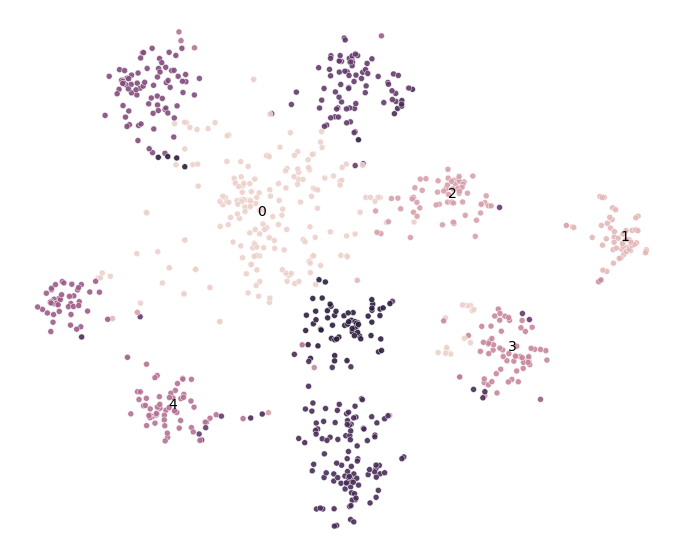

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.scatterplot(all_proj['x'],all_proj['y'],hue=all_proj['song_topic'],alpha=0.9)
txts = []
for i in [0,1,2,3,4]:
    xtext, ytext = np.median(all_proj[all_proj['song_topic']==i].loc[:,'x':'y'],axis=0)
    txt = ax.text(xtext, ytext, i, fontsize=14)
    txts.append(txt)
ax.get_legend().remove()
# plt.title('Smaller Topics for {}'.format(int(df['year'].median())))
plt.axis('off');

In [254]:
beatles = pd.read_pickle("AllBeatlesProj.pkl")

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [255]:
beatles = beatles[beatles['artist']=='The Beatles']

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
beatles = beatles.reset_index()
beatles = beatles.drop_duplicates(subset='song_title').reset_index().drop(columns='index')
beatles['lyrics'] = beatles['lyrics'].apply(lambda x: rep_linebrk(x))

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [257]:
beatles

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,song_title,artist,album_title,release_date,lyrics,singer
0,Taxman,The Beatles,Revolver (UK),1966-08-05 00:00:00,"One, two, three, four One, two... (One, two, ...",Harrison
1,Eleanor Rigby,The Beatles,Revolver (UK),1966-08-05 00:00:00,"Ah, look at all the lonely people! Ah, look at...",McCartney
2,I'm Only Sleeping,The Beatles,Revolver (UK),1966-08-05 00:00:00,When I wake up early in the morning Lift my he...,Lennon
3,Love You To,The Beatles,Revolver (UK),1966-08-05 00:00:00,"Each day just goes so fast I turn around, it's...",Harrison
4,"Here, There and Everywhere",The Beatles,Revolver (UK),1966-08-05 00:00:00,To lead a better life I need my love to be her...,McCartney
...,...,...,...,...,...,...
173,Honey Pie,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,She was a working girl North of England way No...,McCartney
174,Savoy Truffle,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,Creme tangerine and Montelimar A ginger sling ...,Harrison
175,Cry Baby Cry,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,Cry baby cry Make your mother sigh She's old e...,Lennon
176,Revolution 9,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,...bottle of claret for you if I'd realised. I...,"""Instrumental"""


In [258]:
corpus_list = beatles['lyrics'].tolist()
# Let's turn all of the tweets into a list, so our Pipeline
# can work with our data better

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words=stopwords, max_df=0.80, min_df=10), 
              tokenizer=TweetTokenizer().tokenize, 
              stemmer=SnowballStemmer("english",ignore_stopwords=True))
# TF-IDF may be better for our dataset. It works better with sparse datasets

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
nlp.fit(corpus_list)
dtm_beatles = nlp.transform(corpus_list)
# Fit the corpus and transform the corpus

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
nmf_model = NMF(5, random_state=0)
doc_topic = nmf_model.fit_transform(dtm_beatles)
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 15)
# 0 - Desire, # 1 - Reality, # 2 - Relationships, # 3 - Home, # 4 - Fun


Topic  0
need, tell, right, never, think, feel, mind, word, pleas, look, day, noth, good, time, still

Topic  1
babi, man, said, littl, fine, think, work, tell, feel, everybodi, old, run, right, tri, nobodi

Topic  2
girl, mine, day, look, anoth, kind, good, pleas, littl, chang, give, everi, take, better, run

Topic  3
back, cri, home, sing, sky, wait, blue, heart, never, lone, world, round, keep, eye, sit

Topic  4
long, danc, time, sing, boy, day, wait, tear, mani, happi, stand, pleas, heart, ever, night
/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [285]:
H = pd.DataFrame(doc_topic.round(5),
             index = corpus_list,
             columns = range(5))

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [286]:
beatles['song_topic'] = H.idxmax(axis=1).tolist()
beatles['song_topic'].value_counts()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    79
3    37
2    23
4    22
1    17
Name: song_topic, dtype: int64

In [291]:
album_titles = beatles['album_title'].unique().tolist()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [319]:
topics = {}
for album in album_titles:
    topics[album]= beatles[beatles['album_title']==album]['song_topic'].value_counts()
    # topics.append(beatles[beatles['album_title']==album]['song_topic'].value_counts())

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [430]:
topic_df = pd.DataFrame(topics).T.fillna(0)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [440]:
dates = beatles[['album_title','release_date']].drop_duplicates()['release_date']

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [446]:
dates.reset_index(drop=True,inplace=True)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [448]:
dates

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     1966-08-05 00:00:00
1     1965-12-03 00:00:00
2     1965-08-06 00:00:00
3     1963-03-22 00:00:00
4     1963-11-22 00:00:00
5     1964-06-26 00:00:00
6     1970-05-08 00:00:00
7     1967-11-27 00:00:00
8     1964-12-04 00:00:00
9     1967-05-26 00:00:00
10    1969-09-26 00:00:00
11    1969-11-03 00:00:00
12    1968-11-22 00:00:00
Name: release_date, dtype: object

In [451]:
topic_df['release_date']=dates

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [453]:
for inx, date in enumerate(dates):
    topic_df.iloc[inx,5] = date

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [469]:
topic_df

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0,1,2,3,4
release_date,,,,,,
1966-08-05,Revolver (UK),10.0,1.0,1.0,1.0,1.0
1965-12-03,Rubber Soul (UK),7.0,2.0,3.0,1.0,1.0
1965-08-06,Help! (UK),7.0,1.0,4.0,2.0,0.0
1963-03-22,Please Please Me,3.0,3.0,2.0,3.0,3.0
1963-11-22,With the Beatles,4.0,2.0,0.0,5.0,3.0
1964-06-26,A Hard Day’s Night (US),2.0,0.0,1.0,3.0,2.0
1970-05-08,Let It Be,5.0,1.0,3.0,2.0,1.0
1967-11-27,Magical Mystery Tour (US),4.0,1.0,0.0,3.0,2.0
1964-12-04,Beatles for Sale,5.0,4.0,2.0,2.0,1.0


In [480]:
topic_df['total_songs'] = topic_df.sum(axis=1)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [492]:
topic_df

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0,1,2,3,4,total_songs
release_date,,,,,,,
1966-08-05,Revolver (UK),10.0,1.0,1.0,1.0,1.0,14.0
1965-12-03,Rubber Soul (UK),7.0,2.0,3.0,1.0,1.0,14.0
1965-08-06,Help! (UK),7.0,1.0,4.0,2.0,0.0,14.0
1963-03-22,Please Please Me,3.0,3.0,2.0,3.0,3.0,14.0
1963-11-22,With the Beatles,4.0,2.0,0.0,5.0,3.0,14.0
1964-06-26,A Hard Day’s Night (US),2.0,0.0,1.0,3.0,2.0,8.0
1970-05-08,Let It Be,5.0,1.0,3.0,2.0,1.0,12.0
1967-11-27,Magical Mystery Tour (US),4.0,1.0,0.0,3.0,2.0,10.0
1964-12-04,Beatles for Sale,5.0,4.0,2.0,2.0,1.0,14.0


In [496]:
for topic in [0,1,2,3,4]:
    topic_df[str(topic) + 'perc'] = topic_df[topic]/topic_df['total_songs']

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [497]:
topic_df

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0,1,2,3,4,total_songs,0perc,1perc,2perc,3perc,4perc
release_date,,,,,,,,,,,,
1966-08-05,Revolver (UK),10.0,1.0,1.0,1.0,1.0,14.0,0.714286,0.071429,0.071429,0.071429,0.071429
1965-12-03,Rubber Soul (UK),7.0,2.0,3.0,1.0,1.0,14.0,0.500000,0.142857,0.214286,0.071429,0.071429
1965-08-06,Help! (UK),7.0,1.0,4.0,2.0,0.0,14.0,0.500000,0.071429,0.285714,0.142857,0.000000
1963-03-22,Please Please Me,3.0,3.0,2.0,3.0,3.0,14.0,0.214286,0.214286,0.142857,0.214286,0.214286
1963-11-22,With the Beatles,4.0,2.0,0.0,5.0,3.0,14.0,0.285714,0.142857,0.000000,0.357143,0.214286
1964-06-26,A Hard Day’s Night (US),2.0,0.0,1.0,3.0,2.0,8.0,0.250000,0.000000,0.125000,0.375000,0.250000
1970-05-08,Let It Be,5.0,1.0,3.0,2.0,1.0,12.0,0.416667,0.083333,0.250000,0.166667,0.083333
1967-11-27,Magical Mystery Tour (US),4.0,1.0,0.0,3.0,2.0,10.0,0.400000,0.100000,0.000000,0.300000,0.200000
1964-12-04,Beatles for Sale,5.0,4.0,2.0,2.0,1.0,14.0,0.357143,0.285714,0.142857,0.142857,0.071429


In [455]:

topic_df.reset_index(inplace=True)
topic_df.rename({'index':'album_title'},inplace=True)
topic_df.set_index('release_date',inplace=True)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='release_date'>

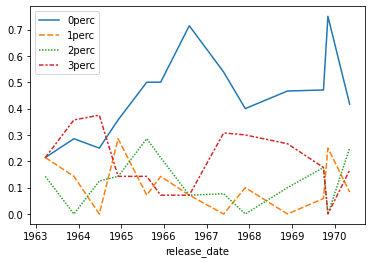

In [498]:
sns.lineplot(data=topic_df.iloc[:,7:11])

In [502]:
album_titles

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Revolver (UK)',
 'Rubber Soul (UK)',
 'Help! (UK)',
 'Please Please Me',
 'With the Beatles',
 'A Hard Day’s Night (US)',
 'Let It Be',
 'Magical Mystery Tour (US)',
 'Beatles for Sale',
 'Sgt. Pepper’s Lonely Hearts Club Band',
 'Abbey Road',
 'Yellow Submarine',
 'The Beatles (The White Album)']

In [499]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(columns=('album', 'song', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for album in album_titles:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    for lyrics in songs:
        

    f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
                 
df.plot.bar(x='artist', stacked=True)
plt.show()          

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/joecowell/nltk_data'
    - '/Users/joecowell/opt/anaconda3/envs/proj5/nltk_data'
    - '/Users/joecowell/opt/anaconda3/envs/proj5/share/nltk_data'
    - '/Users/joecowell/opt/anaconda3/envs/proj5/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [505]:
sid = SentimentIntensityAnalyzer()

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [514]:
song2 = beatles.lyrics[1]

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [532]:
beatles['sentiment'] = ''

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [535]:
beatles

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,song_title,artist,album_title,release_date,lyrics,singer,song_topic,sentiment
0,Taxman,The Beatles,Revolver (UK),1966-08-05 00:00:00,"One, two, three, four One, two... (One, two, ...",Harrison,0,
1,Eleanor Rigby,The Beatles,Revolver (UK),1966-08-05 00:00:00,"Ah, look at all the lonely people! Ah, look at...",McCartney,3,
2,I'm Only Sleeping,The Beatles,Revolver (UK),1966-08-05 00:00:00,When I wake up early in the morning Lift my he...,Lennon,0,
3,Love You To,The Beatles,Revolver (UK),1966-08-05 00:00:00,"Each day just goes so fast I turn around, it's...",Harrison,4,
4,"Here, There and Everywhere",The Beatles,Revolver (UK),1966-08-05 00:00:00,To lead a better life I need my love to be her...,McCartney,0,
...,...,...,...,...,...,...,...,...
173,Honey Pie,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,She was a working girl North of England way No...,McCartney,3,
174,Savoy Truffle,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,Creme tangerine and Montelimar A ginger sling ...,Harrison,0,
175,Cry Baby Cry,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,Cry baby cry Make your mother sigh She's old e...,Lennon,3,
176,Revolution 9,The Beatles,The Beatles (The White Album),1968-11-22 00:00:00,...bottle of claret for you if I'd realised. I...,"""Instrumental""",0,


In [539]:
for inx, lyrics in enumerate(beatles.lyrics):
    beatles.iloc[inx,7:11] = sid.polarity_scores(lyrics)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: cannot set using a multi-index selection indexer with a different length than the value

In [540]:
beatles.iloc[:,7]

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       
1       
2       
3       
4       
      ..
173     
174     
175     
176     
177     
Name: sentiment, Length: 178, dtype: object

In [527]:
beatles.lyrics

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      One, two, three, four One, two...  (One, two, ...
1      Ah, look at all the lonely people! Ah, look at...
2      When I wake up early in the morning Lift my he...
3      Each day just goes so fast I turn around, it's...
4      To lead a better life I need my love to be her...
                             ...                        
173    She was a working girl North of England way No...
174    Creme tangerine and Montelimar A ginger sling ...
175    Cry baby cry Make your mother sigh She's old e...
176    ...bottle of claret for you if I'd realised. I...
177    Now it's time to say good night Good night, sl...
Name: lyrics, Length: 178, dtype: object

In [515]:
ss2 = sid.polarity_scores(song2)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [543]:
ss

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.024, 'neu': 0.889, 'pos': 0.087, 'compound': 0.6832}

In [524]:
ss2

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.201, 'neu': 0.765, 'pos': 0.034, 'compound': -0.9876}

In [172]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
# There are a few different ways to get topics. Let's see how LDA works with out data.

In [175]:
pyLDAvis.enable_notebook()
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tfidf.fit(dtm_beatles)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_beatles, nlp.vectorizer)

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.045411  0.012928       1        1  40.249530
3     -0.059686 -0.017514       2        1  30.753524
4      0.007555 -0.082959       3        1  10.208426
2      0.072191  0.034331       4        1   9.681635
1     -0.065471  0.053214       5        1   9.106885, topic_info=     Term       Freq      Total Category  logprob  loglift
67    man   6.000000   6.000000  Default  30.0000  30.0000
16   come  10.000000  10.000000  Default  29.0000  29.0000
98    sky   3.000000   3.000000  Default  28.0000  28.0000
6    babi   7.000000   7.000000  Default  27.0000  27.0000
96   sing   5.000000   5.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
125  want   0.659558   8.948498   Topic5  -4.2436  -0.2115
5    away   0.428554   4.745010   Topic5  -4.6748  -0.0083
67    man   0.473523   6.147689   Topic5  -4.5750  -0.1675
92   said   0.430986   4.891314   Topic5  -4.6691  -0.0330
114  time   0.473183   6.756595   Topic5  -4.5757  -0.2627

[223 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.659328   alon
1         1  0.477688  alway
1         2  0.238844  alway
2         1  0.318164  anoth
2         2  0.636328  anoth
...     ...       ...    ...
129       3  0.225637  world
129       4  0.225637  world
130       1  0.818032  wrong
131       1  0.418291   year
131       2  0.418291   year

[264 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

In [243]:
import gensim
import pprint

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
corpus_list

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


s the scene, I was on my way Chasing my own dream with Rory and the Hurricanes Before he became the keeper of the plane And by the name of Johnny Guitar Electricity coming through his fingers Every time he plays, everybody linger Electricity, and I still remember back in the day No one there will forget the way he played Electricity As it turned out good Made it here to Hollywood Playing just the same I guess there's things that never change Just like from the start Every night I gave my heart Trying to make it good Just like I know I could The gangster of love Is smiling from above So we play this one to Johnny Guitar Electricity coming through his fingers Every time he plays, everybody linger Electricity, and I still remember back in the day No one there will forget the way he played Electricity Electricity coming through his fingers Every time he plays, everybody linger Electricity, and I still remember back in the day No one there will forget the way he played Electricity",
 "When 

In [246]:
# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in corpus_list]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]

/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)

Dictionary(5051 unique tokens: ["'cause", '(haha,', '(one,', '(taxman!)', 'advice']...)
/Users/joecowell/opt/anaconda3/envs/proj5/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
